In [0]:
from platform import python_version
import tensorflow as tf
from tensorflow import keras
import numpy as np

from tensorflow.keras.models import Sequential,Model,load_model
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten,Concatenate,Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import Callback,EarlyStopping
from keras import regularizers
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import random
import cv2
import os
from google.colab import drive

drive.mount('/content/gdrive',force_remount=True)


Using TensorFlow backend.


Mounted at /content/gdrive


In [0]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 10kB/s 
     |████████████████████████████████| 3.9MB 55.2MB/s 
     |████████████████████████████████| 450kB 51.9MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
root_path = "gdrive/My Drive/aip2020"
tpath=os.path.join(root_path,"train_datab/images")

x_traindata=np.load(root_path +'x_train.npy')
y_traindata=np.load(root_path +'/yfinal.npy')
x_testdata=np.load(root_path +'x_test.npy')
y_testdata=np.load(root_path +'y_test.npy')


In [0]:
a=np.array(x_traindata)
a=np.reshape(a,[400,768,1024,1])

b=np.array(y_traindata)
b=np.reshape(b,[400,192,256,1])

a_test=np.array(x_testdata)
a_test=np.reshape(a_test,[316,768,1024,1])
b_test=np.array(y_testdata)
b_test=np.reshape(b_test,[316,192,256,1])


In [0]:
K.clear_session()
# filter_num_initial, conv_len_initial, maxpooling_size = 24, 5, (2, 2)
def custloss(y_true,y_pred):
  s1=K.sum(Flatten()(y_true))
  s2=K.sum(Flatten()(y_pred))
  s=0.0001*(K.square(s1-s2)/s2);
  e=keras.losses.mean_squared_error(y_true,y_pred)
  return e+s


def ourmodel(filter_num_initial,conv_len_initial,input_s):
  model= input_s
  model=Conv2D(filter_num_initial, kernel_size=(conv_len_initial, conv_len_initial),padding='same')(input)
  model= Activation('relu')(model)
  model=MaxPooling2D(pool_size=(2,2))(model)
  model=Conv2D(2*filter_num_initial,(conv_len_initial-2,conv_len_initial-2),padding='same')(model)
  model=Activation('relu')(model)
  model=MaxPooling2D(pool_size=(2,2))(model)
  model=Conv2D(filter_num_initial,(conv_len_initial-2,conv_len_initial-2),padding='same')(model)
  model=Activation('relu')(model)
  model=Conv2D(filter_num_initial//2,(conv_len_initial-2,conv_len_initial-2),padding='same')(model)
  model=Activation('relu')(model)
  model=Conv2D(1,(1,1),padding='same')(model)
  model=Activation('relu')(model)
  return model


In [0]:
model_fil_7=ourmodel(24,5)
model_fil_7.load_weights('fil_5.h5')
history=model_fil_7.fit(a[100:120,:,:,:],b[100:120,:,:,:],epochs=200,batch_size=1)
model_fil_7.save('fil5.h5')



146.47277575708674
136.83568


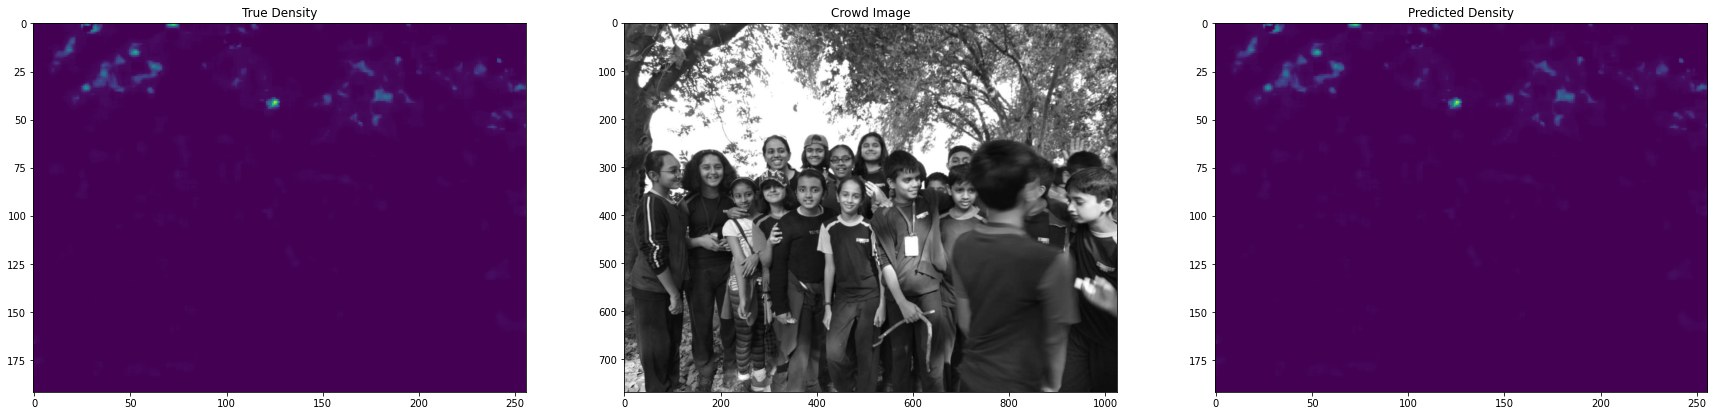

In [0]:
img=cv2.imread('test.jpg',0)
[m,n]=img.shape  
img_n=np.reshape(img,[1,m,n,1])/255
depth_test=model.predict(img_n)
[c,m,n,d]=depth_test.shape 
depth_img=np.reshape(depth_test,[m,n])
# depth_img[depth_img<0]=0
sumtrue=np.sum(b[i,:,:,0])
sumpred=np.sum(depth_img)
diff+=np.abs(sumpred-sumtrue)
count.append([sumtrue,sumpred])
truecount.append(sumtrue)
fig = plt.figure(figsize=[30, 15])
g = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(depth_img)
g.set_title('True Density')
# plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
g = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(depth_img)

g.set_title('Predicted Density')
# plt.colorbar( orientation='horizontal')
g = fig.add_subplot(1, 3, 2)
g.set_title('Crowd Image')
imgplot = plt.imshow(img,cmap='gray')
depth_img[depth_img<0]=0
print(np.sum(b[i,:,:,0]))
print(np.sum(depth_img))

plt.savefig('result'+str(i)+'.png')

In [0]:
img.shape

(768, 1024, 3)

In [1]:
model=load_model(root_path+'/newest7.h5')
count=[]
truecount=[]
diff=0
for i in range(400):
  print(i)
  img=a[i,:,:,0]
  [m,n]=img.shape  
  img_n=np.reshape(img,[1,m,n,1])
  depth_test=model.predict(img_n)
  [c,m,n,d]=depth_test.shape 
  depth_img=np.reshape(depth_test,[m,n])
  # depth_img[depth_img<0]=0
  sumtrue=np.sum(b[i,:,:,0])
  sumpred=np.sum(depth_img)
  diff+=np.abs(sumpred-sumtrue)
  count.append([sumtrue,sumpred])
  truecount.append(sumtrue)
  if(np.abs(sumpred-sumtrue)>0):
    fig = plt.figure(figsize=[30, 15])
    g = fig.add_subplot(1, 3, 1)
    imgplot = plt.imshow(b[i,:,:,0])
    g.set_title('True Density')
    # plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
    g = fig.add_subplot(1, 3, 3)
    imgplot = plt.imshow(depth_img)
    
    g.set_title('Predicted Density')
    # plt.colorbar( orientation='horizontal')
    g = fig.add_subplot(1, 3, 2)
    g.set_title('Crowd Image')
    imgplot = plt.imshow(img,cmap='gray')
    depth_img[depth_img<0]=0
    print(np.sum(b[i,:,:,0]))
    print(np.sum(depth_img))
    break
    plt.savefig('result'+str(i)+'.png')
    

NameError: ignored

In [0]:
count=np.array(count)
truecount=count[:,0]
predcount=count[:,1]
# trainerr=count[0:320]
# testerr=count[320:400]
# arrtrain=np.array(trainerr)
# arrtrain=np.sort(arrtrain)
# k1=arrtrain[arrtrain[:,0].argsort()]
# arrtest=np.array(testerr)
# arrtest=np.sort(arrtest)
# l1=arrtest[arrtest[:,0].argsort()]


4921.426523584195
49305.81364079127


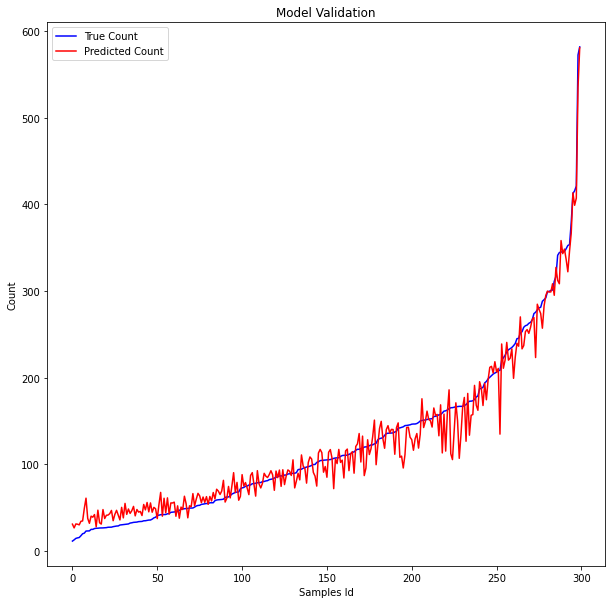

In [0]:
counttest=np.array(count[0:300])
truecount=count[:,0]
predcount=count[:,1]
a=counttest[counttest[:,0].argsort()]
plt.figure(figsize=[10,10])
ax=plt.plot(a[:,0],'b',label='True Count')
ax=plt.plot(a[:,1],'r', label='Predicted Count',)
plt.legend()
plt.xlabel('Samples Id')
plt.ylabel('Count')
plt.title('Model Validation')
plt.savefig('books_read.png')
print(diff)
print(np.sum(truecount))


In [0]:
from google.colab import drive
drive.mount('/content/drive')

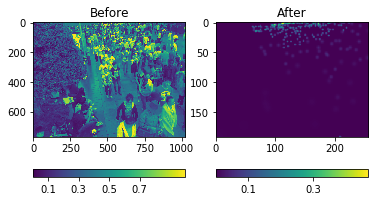

In [0]:
fig = plt.figure()
g = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(a[0,:,:,0])
g.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
g = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(b[0,:,:,0])

g.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

In [0]:
apath=os.path.join(root_path,'test/test_data/images')
from scipy.io import loadmat
included_extensions=['depth']
tpath=os.path.join(root_path,"test/test_data")
file_names = [fn for fn in os.listdir(tpath)
              if any(fn.startswith(ext) for ext in included_extensions)]
for f in np.sort(file_names):
  
  matpath=os.path.join(tpath,f)
  depthimg=loadmat(matpath)['depthimg']
  t=np.array(depthimg)
  break
for i in np.sort(os.listdir(apath)):
  print(i)
  ipath=os.path.join(apath,i)

  img=cv2.imread(ipath,cv2.IMREAD_GRAYSCALE);
  img=np.array(img)/255
  
  break
[m,n]=img.shape  
img_n=np.reshape(img,[1,m,n,1])
depth_test=model.predict(img_n)
[c,m,n,d]=depth_test.shape 
depth_img=np.reshape(depth_test,[m,n])
fig = plt.figure()
g = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(t)
g.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
g = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(depth_img)

g.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

In [0]:
depth_img[depth_img<0]=0
fig = plt.figure()
g = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(b[i,:,:,0])
g.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
g = fig.add_subplot(1, 2, 2)


imgplot = plt.imshow(depth_img)

g.set_title('After')
plt.colorbar( orientation='horizontal')
print(np.sum(b[i,:,:,0]))
print(np.sum(depth_img))


NameError: ignored

In [0]:
def ourmodel(filter_num_initial,conv_len_initial,input_s):
  
  model=Conv2D(filter_num_initial, kernel_size=(conv_len_initial, conv_len_initial),padding='same')(input_s)
  model= Activation('relu')(model)
  model=MaxPooling2D(pool_size=(2,2))(model)
  model=Conv2D(2*filter_num_initial,(conv_len_initial-2,conv_len_initial-2),padding='same')(model)
  model=Activation('relu')(model)
  model=MaxPooling2D(pool_size=(2,2))(model)
  model=Conv2D(filter_num_initial,(conv_len_initial-2,conv_len_initial-2),padding='same')(model)
  model=Activation('relu')(model)
  model=Conv2D(filter_num_initial//2,(conv_len_initial-2,conv_len_initial-2),padding='same')(model)
  model=Activation('relu')(model)
  model=Conv2D(1,(1,1),padding='same')(model)
  model=Activation('relu')(model)
  return model

ip=Input(shape=(None,None,1))
model9=Model(ip,ourmodel(16,9,ip))
model7=Model(ip,ourmodel(20,7,ip))
model5=Model(ip,ourmodel(24,5,ip))
merged = Concatenate(axis=3)([model9.output,model7.output,model5.output])
density_map = Conv2D(1, (1, 1), padding='same')(merged)
model = Model(ip,density_map)
model.summary()
# model9.load_weights('fil9.h5')
# model7.load_weights('fil7.h5')
# model5.load_weights('fil5.h5')
model.compile(loss='mean_squared_error',optimizer=Adam())
# model.load_weights('finalithink.h5')

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, None, None, 1 1312        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, None, None, 2 1000        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, None, None, 2 624         input_2[0][0]                    
____________________________________________________________________________________________

In [0]:
model.load_weights(root_path+'/newest6.h5')
model.compile(loss='mean_squared_error',optimizer=SGD())

history=model.fit(a,b,epochs=100,batch_size=1)
model.save(root_path+'/newest7.h5')

Train on 400 samples
Epoch 1/100
400/400 [==============================] - 17s 41ms/sample - loss: 6.7298e-05
Epoch 2/100
400/400 [==============================] - 16s 40ms/sample - loss: 6.7295e-05
Epoch 3/100
400/400 [==============================] - 16s 40ms/sample - loss: 6.7292e-05
Epoch 4/100
400/400 [==============================] - 16s 40ms/sample - loss: 6.7292e-05
Epoch 5/100
400/400 [==============================] - 16s 40ms/sample - loss: 6.7289e-05
Epoch 6/100
400/400 [==============================] - 16s 40ms/sample - loss: 6.7287e-05
Epoch 7/100
400/400 [==============================] - 16s 40ms/sample - loss: 6.7285e-05
Epoch 8/100
400/400 [==============================] - 16s 40ms/sample - loss: 6.7283e-05
Epoch 9/100
400/400 [==============================] - 16s 40ms/sample - loss: 6.7282e-05
Epoch 10/100
400/400 [==============================] - 16s 40ms/sample - loss: 6.7280e-05
Epoch 11/100
400/400 [==============================] - 16s 40ms/sample - loss

In [0]:
model.save('newest2.h5')